# Question 1

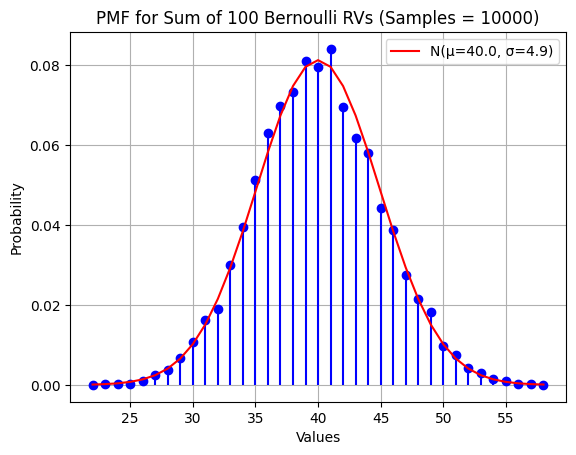

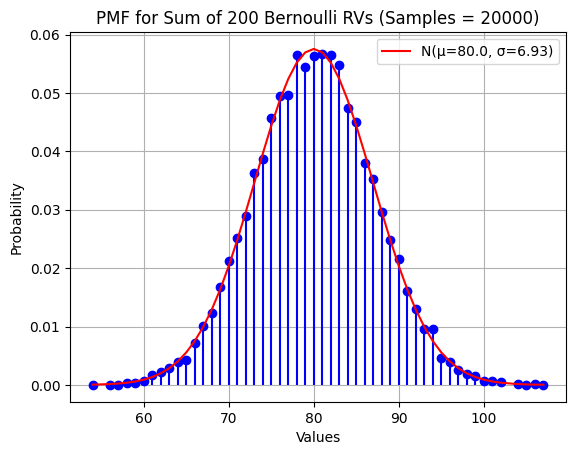

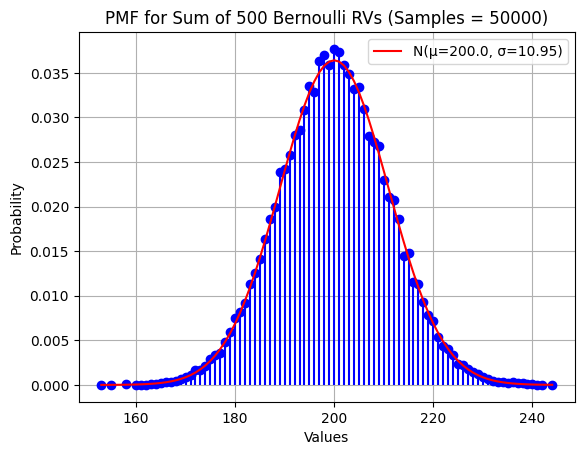

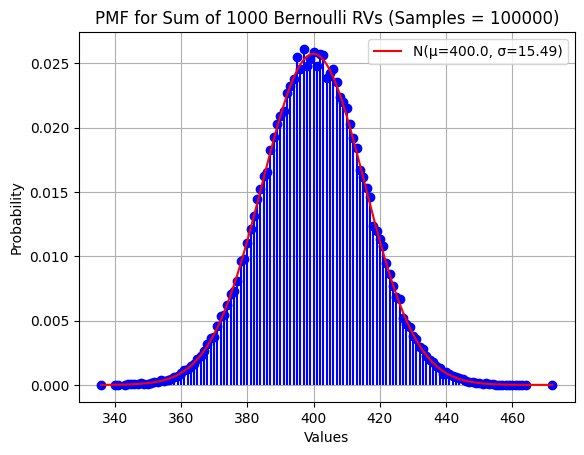

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
n_values = [100, 200, 500, 1000]  # Different n values
p = 0.4

# Sample sizes
# Larger sample size for larger n
sample_sizes = {100: 10000, 200: 20000, 500: 50000, 1000: 100000}

for n in n_values:
    samples = sample_sizes[n]
    sums = [np.sum(np.random.binomial(1, p, size=n)) for _ in range(samples)]

    # Compute PMF
    unique_values, counts = np.unique(sums, return_counts=True)
    probabilities = counts / samples

    # Compute Gaussian approximation
    mean = n * p
    std_dev = np.sqrt(n * p * (1 - p))
    gaussian_pmf_approx = stats.norm.cdf(unique_values + 0.5, mean, std_dev) - stats.norm.cdf(unique_values - 0.5, mean, std_dev)

    # Plot PMF and Gaussian approximation
    plt.figure()
    plt.stem(unique_values, probabilities, linefmt='b-', markerfmt='bo', basefmt=" ")
    plt.plot(unique_values, gaussian_pmf_approx, 'r-', label=f'N(μ={mean}, σ={round(std_dev,2)})')

    plt.xlabel("Values")
    plt.ylabel("Probability")
    plt.title(f"PMF for Sum of {n} Bernoulli RVs (Samples = {samples})")
    plt.grid(True)
    plt.legend()
    plt.show()


# Question 2

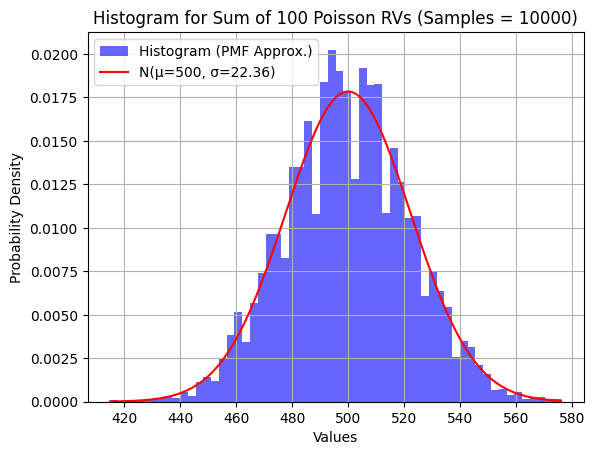

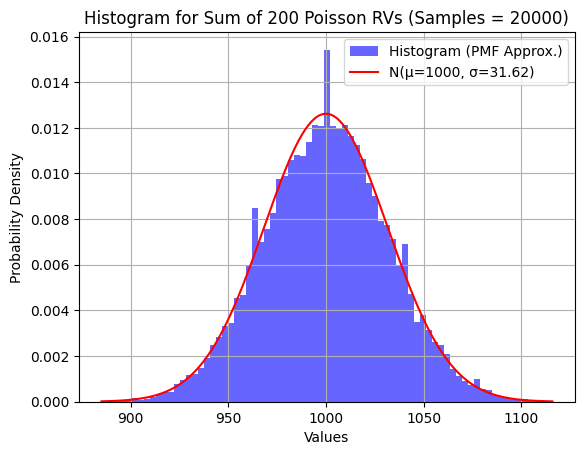

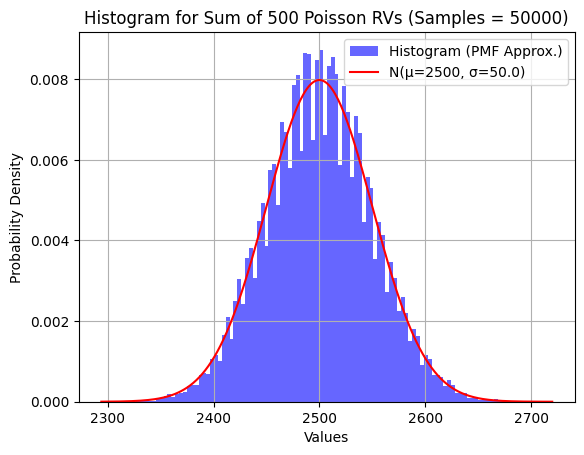

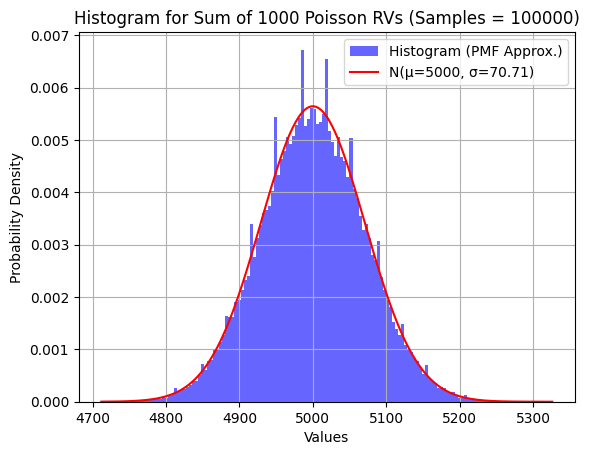

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
n_values = [100, 200, 500, 1000]
_lambda = 5

# Larger sample size for larger n
sample_sizes = {100: 10000, 200: 20000, 500: 50000, 1000: 100000}

for n in n_values:
    samples = sample_sizes[n]
    sums = [np.sum(np.random.poisson(_lambda, size=n)) for _ in range(samples)]

    # Gaussian Random Variable
    mean = n * _lambda
    std_dev = np.sqrt(n * _lambda)

    # Create a histogram
    plt.figure()
    plt.hist(sums, bins='auto', density=True, alpha=0.6, color='b', label="Histogram (PMF Approx.)")

    # Smoothening Gaussian curve
    x = np.linspace(min(sums), max(sums), 300)
    gaussian_pdf = stats.norm.pdf(x, mean, std_dev)

    plt.plot(x, gaussian_pdf, 'r-', label=f'N(μ={mean}, σ={round(std_dev,2)})')

    plt.xlabel("Values")
    plt.ylabel("Probability Density")
    plt.title(f"Histogram for Sum of {n} Poisson RVs (Samples = {samples})")
    plt.grid(True)
    plt.legend()
    plt.show()


# Question 3

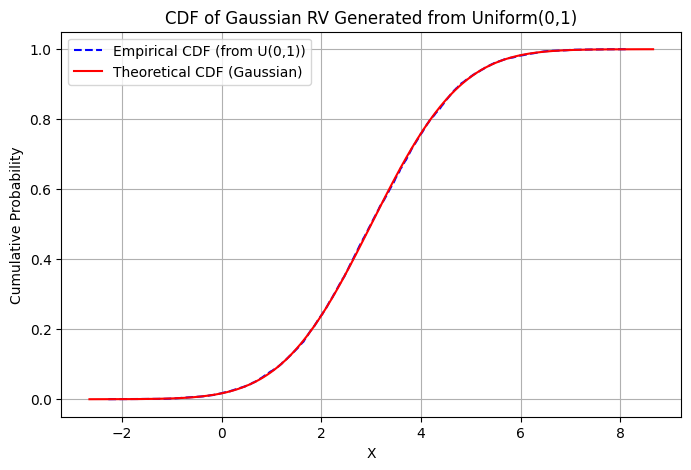

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Mean and Std dev for Gaussian RV
mu = 3
sigma = np.sqrt(2)

# Uniform RV in [0,1]
num_samples = 10_000
U = np.random.uniform(0, 1, num_samples)

# Transform uniform samples to Gaussian using inverse CDF
X = stats.norm.ppf(U, loc=mu, scale=sigma)

# Compute empirical CDF
sorted_X = np.sort(X)
empirical_cdf = np.arange(1, num_samples + 1) / num_samples

# Plot theoretical CDF
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 300)
gaussian_cdf = stats.norm.cdf(x_values, loc=mu, scale=sigma)

# Plot the empirical and theoretical CDFs
plt.figure(figsize=(8, 5))
plt.plot(sorted_X, empirical_cdf, label="Empirical CDF (from U(0,1))", linestyle="--", color="b")
plt.plot(x_values, gaussian_cdf, label="Theoretical CDF (Gaussian)", color="r")
plt.xlabel("X")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Gaussian RV Generated from Uniform(0,1)")
plt.legend()
plt.grid()
plt.show()


# Question 4

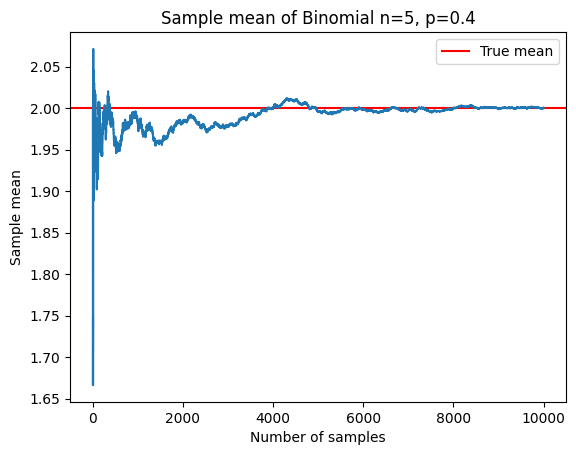

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sum = 0
sample_means = []

# 10,000 samples
for i in range(10_000):
  X = np.random.binomial(5, 0.4)
  sum += X
  mean = sum/(i+1)
  sample_means.append(mean)

# plot sample_means
import matplotlib.pyplot as plt
plt.axhline(y=2, color='r', linestyle='-', label='True mean')
plt.plot(sample_means)
plt.xlabel('Number of samples')
plt.ylabel('Sample mean')
plt.title('Sample mean of Binomial n=5, p=0.4')
plt.legend()
plt.show()

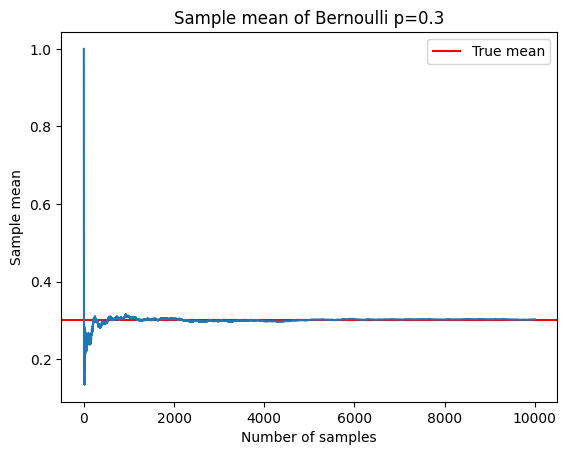

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sum = 0
sample_means = []

# 10,000 samples
for i in range(10_000):
  X = np.random.binomial(1, 0.3)
  sum += X
  mean = sum/(i+1)
  sample_means.append(mean)

# Plot sample_means
import matplotlib.pyplot as plt
plt.axhline(y=0.3, color='r', linestyle='-', label='True mean')
plt.plot(sample_means)
plt.xlabel('Number of samples')
plt.ylabel('Sample mean')
plt.title('Sample mean of Bernoulli p=0.3')
plt.legend()
plt.show()

# Question 5

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

num_samples = 10_000

# samples from normal distribution X
X = np.random.normal(loc=0, scale=1, size=num_samples)

# X^2
X_squared = X**2

# Calcuate estimated mean of X^2 for 10,000 samples
estimated_mean = np.mean(X_squared)

# Print the estimated mean
print(f"Estimated Mean of X^2: {estimated_mean}")

Estimated Mean of X^2: 0.9939478554328285
